In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.integrate

# plotting


In [5]:
x = np.linspace(0,np.pi*2, 100)
y = np.sin(x)
z = np.cos(x)
fig,ax = plt.figure(1,figsize=(10,4))
plt.plot(x,y)
plt.figure(2,figsize=(15,10))
plt.polar(x,y)
plt.polar(x,z,"")
plt.xlabel("Theta",loc='left')
plt.ylabel("F(theta)")
plt.legend()

plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 1000x400 with 0 Axes>

# Surfaces

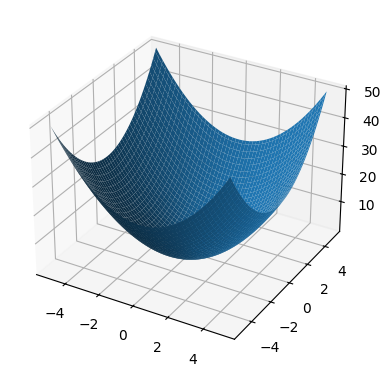

In [6]:
#still need to understand meshgrid
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

xy, yx = np.meshgrid(x,y)

z = xy**2 + yx**2



fig = plt.figure(3, figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xy,yx,z)

np.min(z)


# roots


In [39]:
import scipy.optimize as opt

def function(x):
  return x**3-6*x**2+9*x-3

x = np.linspace(-10,10,10)
roots = []
for i in x:
  result = opt.fsolve(function,i)
  result = np.round(result,4)
  if result not in roots:
    roots.append(result)

print(roots)


[array([0.4679]), array([1.6527]), array([3.8794])]


# 24. uzdevums (KD1)

Uzzīmēt $y=sin(2x)+sin(x^2)$
funkcijas grafiku. Atrast argumenta vērtības, pie kurām
funkcija pieņem vērtību y=1,25. Atrast funkcijas augšanas un dilšanas intervālus.
Funkcija ir definēta intervālā [0..3].


roots: [0.6587 1.3155]
intervals: [1.07807808 1.7027027  1.97897898 2.22822823 2.42042042 2.58258258
 2.73573574 2.86486486 2.99399399]


C:\Users\danie\AppData\Local\Temp\ipykernel_29656\394932043.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


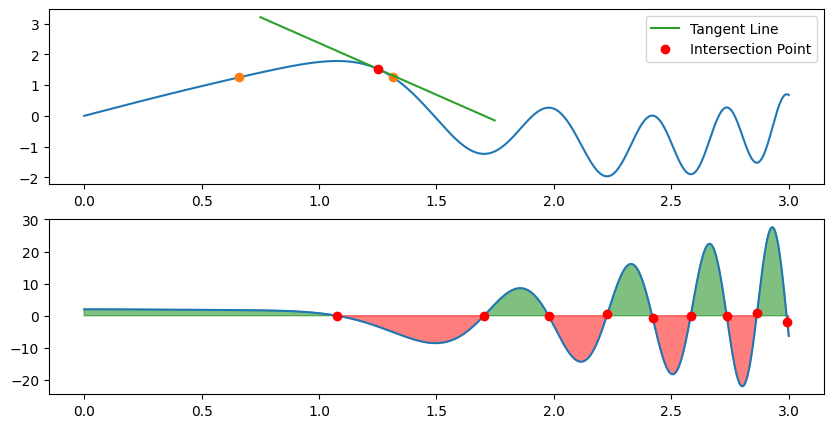

In [9]:


from enum import verify
from tabnanny import verbose
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


x_min = 0
x_max = 3
x = np.linspace(x_min,x_max,1000)

def y(x):
  return np.sin(2*x)+np.sin(x**2)

def f(x):
  return y(x) - 1.25

# dilšanas un augšanas intervāli
def dy(x, dx=0.001):
  return (y(x+dx)-y(x))/dx

roots = np.array([])
  
for i in x:
  result = opt.fsolve(f,i)
  #verify

  if not np.isclose(f(result),0):
    break
  
  result = np.round(result,4)
  if result not in roots and result>=x_min and result<=x_max:
    roots = np.append(roots,result)
# remove duplicates
roots = list(set(roots))

roots = np.array(roots)
print(f"roots: {roots}")
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,5))
ax1.plot(x,y(x))
ax1.plot(roots, y(roots), 'o')



intervals = np.array([])
prev = dy(x[0])
for i in x:
  if(dy(i)>0 and prev<0):
    intervals= np.append(intervals,i)
  elif(dy(i)<0) and (prev>0):
    intervals = np.append(intervals,i)

  prev = dy(i)
  
print(f"intervals: {intervals}")


ax2.plot(x,dy(x))

# to better show the intervals
ax2.fill_between(x,dy(x),0,where=(dy(x)>0),color='green',alpha=0.5)
ax2.fill_between(x,dy(x),0,where=(dy(x)<0),color='red',alpha=0.5)

ax2.plot(intervals,dy(intervals),"ro")


x_tang = 1.25
x_line_length = 1
x_tang_ploting = (x >= (x_tang - (x_line_length * 0.5))) & (x <= (x_tang + (x_line_length * 0.5)))

slope = dy(x_tang)
y_intercept = y(x_tang) - slope * x_tang
y_tang_ploting = slope * x[x_tang_ploting] + y_intercept

ax1.plot(x[x_tang_ploting], y_tang_ploting, label='Tangent Line')
ax1.plot(x_tang, y(x_tang), 'ro', label='Intersection Point')
ax1.legend()
fig.show()


In [13]:
import numpy as np
from scipy.optimize import fsolve
def funcs(p):
  a,b,c,d = p 
  results = np.array([])
  results = np.append(results, 3*a+4*c+2*b+10*d)
  results = np.append(results, b+c**2-d-7)
  results = np.append(results, d-c+2*a-8)
  results = np.append(results, b**3 + 3*c+1.2-a)
  return results


a,b,c,d = fsolve(funcs, (0,0,0,0))  

print(a,b,c,d)

6.468702659911141 0.4944393852319944 1.8647716371771592 -2.789312396726845


# Kontroldarbs interpolation, exterpolation

28. Array of arguments is X={1;2;3;4;5;6;7}. Array of first function is Y={4; 3; 5; 2;0;1;2.5}.
Array of second function is Z={0;1;2.5;6;7;8;6}. Make the polynomial (of degree 5)
approximation of the data. Find the value of y and z for the variable x=0. Draw the discrete
points of the data set and approximation graphs.


y at x=0: 32.999999999999645
z at x=0: 0.8571428571417257


C:\Users\danie\AppData\Local\Temp\ipykernel_31876\1633300761.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


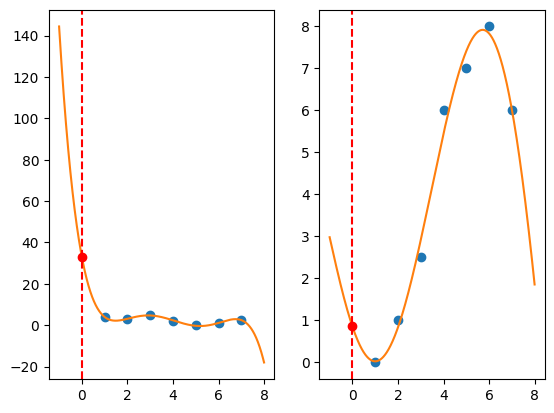

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7]
y = [4,3,5,2,0,1,2.5]
z =[0,1,2.5,6,7,8,6]


# exterpolate using polynominal ^5
x_exterpolated = np.linspace(-1,8,2000)
y_func_exterpolated_coefficients = np.polynomial.polynomial.polyfit(x,y,5)
y_exterpolated = np.polynomial.polynomial.polyval(x_exterpolated, y_func_exterpolated_coefficients)
z_func_exterpolated_coefficients = np.polynomial.polynomial.polyfit(x,z,5)
z_exterpolated = np.polynomial.polynomial.polyval(x_exterpolated, z_func_exterpolated_coefficients)

# find the value of y and z at x = 0
y_at_0 = np.polynomial.polynomial.polyval(0, y_func_exterpolated_coefficients)
z_at_0 = np.polynomial.polynomial.polyval(0, z_func_exterpolated_coefficients)

print(f"y at x=0: {y_at_0}")
print(f"z at x=0: {z_at_0}")


fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x, y, 'o')
ax1.plot(x_exterpolated, y_exterpolated, label='y(x)')
ax1.axvline(x=0, color='red', linestyle='--')
ax1.plot(0, y_at_0, 'ro')
ax2.plot(x, z, 'o')
ax2.plot(x_exterpolated, z_exterpolated, label='z(x)')
ax2.axvline(x=0, color='red', linestyle='--')
ax2.plot(0, z_at_0, 'ro')
fig.show()


# Symbolic math


In [2]:
import sympy as sp

x = sp.symbols('x')

expr = sp.sqrt(43 + 24*sp.sqrt(3)) + sp.sqrt(43 - 24*sp.sqrt(3))

# simplify
expr_simplified = sp.simplify(expr)
print(expr_simplified)

print(expr.evalf())


sqrt(43 - 24*sqrt(3)) + sqrt(24*sqrt(3) + 43)
10.3923048454133


In [3]:
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')

expr = (x+y)**6

print(sp.expand(expr))

x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6


In [5]:
import sympy as sp

x = sp.symbols('x')

expr = sp.integrate((x**2 / (1-x**2)), x)

print(expr)


-x - log(x - 1)/2 + log(x + 1)/2


In [10]:
import sympy as sp
from IPython.display import display, Math

x = sp.symbols('x')

expr = 5*x**2 - ((x+1)*x -4)*x

expr_collect = sp.collect(expr,x)
#print latex

display(Math(sp.latex(expr_collect)))

<IPython.core.display.Math object>

# Ātrais difiņa svārsts

$$ \frac{d^2\theta, dt^2}$$



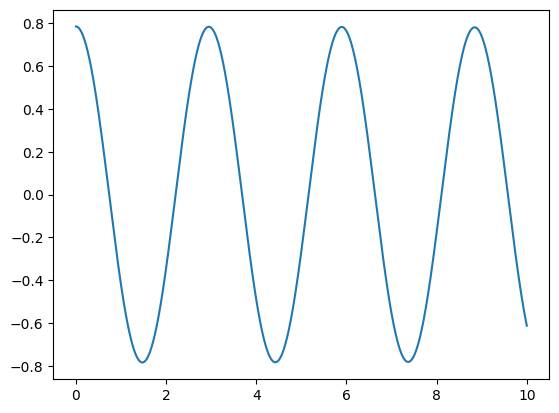

In [15]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
import sympy

#  d^2theta/dt^2 = -g/l * sin(theta)
# gets split into two first order equations
# dtheta/dt = omega
# domega/dt = -g/l * sin(theta)

def equation(t, state):
  theta, omega = state
  dtheta_dt = omega
  domega_dt = -9.81/2 * np.sin(theta)
  return [dtheta_dt, domega_dt]

# initial conditions
theta_0 = np.pi/4
omega_0 = 0
state_0 = [theta_0, omega_0]

t = np.linspace(0, 10, 1000)

results = spi.solve_ivp(equation, [0,10], state_0, t_eval=t)

#plot path
plt.plot(t, results.y[0])
plt.show()



  

In [14]:
import sympy as sp
import numpy as np


r = sp.symbols('r')
matrix = sp.Matrix([[r,1],[2,3]])
#inverse matrix
inverse_matrix = matrix.inv()
display(Math(sp.latex(inverse_matrix)))




<IPython.core.display.Math object>

Power law fit: y = 58.404 * x^-1.585
y at x=4: 6.487838558551586



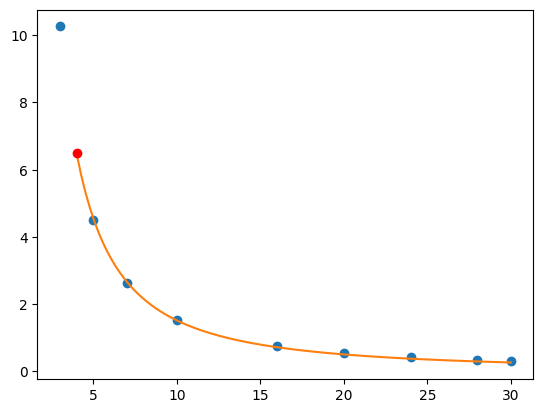

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x_data = np.array([3, 5, 7, 10, 16, 20, 24, 28, 30])
y_data = np.array([10.26, 4.5, 2.63, 1.53, 0.76, 0.56, 0.43, 0.35, 0.31])

def power_law(x, a, b):
    return a * x ** b

params, covariance = curve_fit(power_law, x_data, y_data)

a, b = params
print(f"Power law fit: y = {a:.3f} * x^{b:.3f}")

x = np.linspace(4, 30, 100)
y = power_law(x, a, b)


x_calculate = 4
y_calculate = power_law(x_calculate, a, b)
print(f"y at x={x_calculate}: {y_calculate}")
print()

plt.plot(x_data, y_data, 'o')
plt.plot(x, y)
plt.plot(x_calculate, y_calculate, 'ro')
plt.show()





# ODE example
uzspiestas svārsības

$$m\ddot{u} + cu + b\dot{u} = F \sin(\omega t)$$


$$\ddot{u} = \frac{-cu - b\dot{u} + F \sin(\omega t)}{m}$$

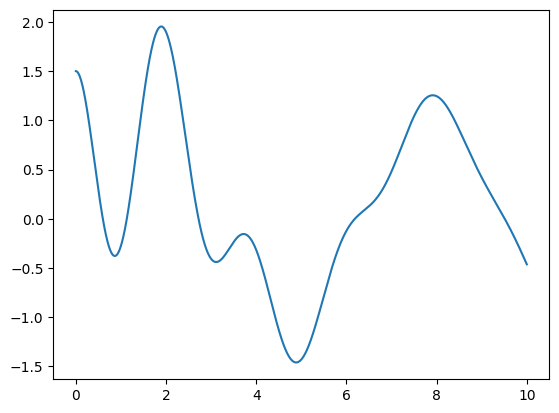

In [11]:
from turtle import end_fill
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

c = 10
b=0.6
F=10
omega = 1
m =1


state0 = [1.5,0]

def ddu(t,state):
    u, du = state
    global c, b, F, omega, m
    ddu = (-c*u - b*du + F*np.sin(omega*t))/m
    return [du, ddu]
  
start_t = 0
end_t = 10
t = np.linspace(start_t, end_t, 10000)
results = solve_ivp(ddu, [start_t,end_t], state0, t_eval=t)

plt.plot(t, results.y[0])
plt.show()